# Archivo entender

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.signal import savgol_filter

Llama a la carpeta que quiere leer. Luego utiliza el paquete os para leer los archivos dentro de la carpera 'rime'. Imprime los archivos

In [3]:
nombre_carpeta='rime'
archivos = os.listdir(nombre_carpeta)
print(archivos)

['P2,3 en IWT-70ms_4A.20200421112931.txt', 'P2,3 en IWT-70ms_4B.20200421110132.txt', 'P2,3 en IWT-70ms_4C.20200420141301.txt', 'P2,3 en IWT-70ms_5A.20200421112023.txt', 'P2,3 en IWT-70ms_5B.20200420143231.txt', 'P2,3 en IWT-70ms_5C.20200420140238.txt', 'P2,3 en IWT-70ms_6A.20200421111056.txt', 'P2,3 en IWT-70ms_6B.20200420142309.txt', 'P2,3 en IWT-70ms_6C.20200420135051.txt']


Un diccionario es una lista pero que en vez de acceder a elementos con numeros se accede con letras / caracteres.

In [4]:
dic={'Miguel':4,'Javi':10}

dic.update({'Ramiro':5})
print(dic['Ramiro'])

5


In [6]:
#crea un diccionario
ensayos={}
#hace un bucle dentro de archivos
for archivo in archivos:
    #abre el archivo 'archivo' dentro de la carpeta rime con lectura (r)
    file = open('rime//'+archivo,'r')
    texto = file.readlines()
    file.close()
    primera_linea = int(texto[0])
    file = open('temporal.txt','w')
    for i in range(primera_linea-1,len(texto)):
        file.write(texto[i])
    file.close()
    df = pd.read_csv('temporal.txt',decimal=',',sep='\t')
    df.index=df.index*0.5
    ensayos.update({archivo[:19]:df})
    print(df.head())

                     Timestamp  S-int-1  S-int-2  S-int-3  S-int-4  S-int-5  \
0.0  21/04/2020 11:29:32.80318  -13.284  -11.492  -11.271  -11.477  -10.871   
0.5  21/04/2020 11:29:33.00318  -13.210  -11.464  -10.977  -11.425  -11.016   
1.0  21/04/2020 11:29:33.20318  -13.167  -11.637  -11.318  -11.485  -10.993   
1.5  21/04/2020 11:29:33.40318  -13.062  -11.564  -11.003  -11.373  -10.750   
2.0  21/04/2020 11:29:33.60318  -13.104  -11.456  -11.404  -11.589  -11.030   

     S-int-6  S-int-7  S-ext-3  S-ext-4  ...  FBG_B4 (nm)  Level (db).8  \
0.0  -10.647  -11.678  -14.631  -14.219  ...   1529.30428        -32.86   
0.5  -10.610  -11.531  -14.382  -14.323  ...   1529.30331        -32.90   
1.0  -10.729  -11.529  -14.375  -14.110  ...   1529.30527        -32.65   
1.5  -10.640  -11.671  -14.311  -14.057  ...   1529.30576        -32.52   
2.0  -10.838  -11.610  -14.549  -14.204  ...   1529.30442        -32.78   

     FBG_B5 (nm)  Level (db).9  FBG_B6 (nm)  Level (db).10  FBG_B7 (nm)  \

[5 rows x 40 columns]
                     Timestamp  S-int-1  S-int-2  S-int-3  S-int-4  S-int-5  \
0.0  21/04/2020 11:10:57.02162  -15.177  -13.226  -12.587  -13.177  -12.620   
0.5  21/04/2020 11:10:57.22162  -15.184  -13.083  -12.650  -13.233  -12.708   
1.0  21/04/2020 11:10:57.42162  -15.065  -13.215  -12.855  -13.130  -12.837   
1.5  21/04/2020 11:10:57.62162  -14.920  -13.157  -12.540  -13.066  -12.787   
2.0  21/04/2020 11:10:57.82162  -14.971  -13.104  -12.719  -13.128  -12.828   

     S-int-6  S-int-7  S-ext-3  S-ext-4  ...  FBG_B4 (nm)  Level (db).8  \
0.0  -12.525  -13.328  -15.585  -15.526  ...   1529.29226        -32.54   
0.5  -12.326  -13.212  -15.502  -15.530  ...   1529.29222        -32.64   
1.0  -12.522  -13.340  -15.790  -15.459  ...   1529.29287        -32.75   
1.5  -12.559  -13.401  -15.538  -15.279  ...   1529.29453        -32.46   
2.0  -12.589  -13.379  -15.491  -15.564  ...   1529.29191        -32.72   

     FBG_B5 (nm)  Level (db).9  FBG_B6 (nm)  Level (

                       Timestamp  S-int-1  S-int-2  S-int-3  S-int-4  S-int-5  \
0.0    21/04/2020 11:29:32.80318  -13.284  -11.492  -11.271  -11.477  -10.871   
0.5    21/04/2020 11:29:33.00318  -13.210  -11.464  -10.977  -11.425  -11.016   
1.0    21/04/2020 11:29:33.20318  -13.167  -11.637  -11.318  -11.485  -10.993   
1.5    21/04/2020 11:29:33.40318  -13.062  -11.564  -11.003  -11.373  -10.750   
2.0    21/04/2020 11:29:33.60318  -13.104  -11.456  -11.404  -11.589  -11.030   
...                          ...      ...      ...      ...      ...      ...   
505.5  21/04/2020 11:32:55.00318  -14.507  -13.533  -13.363  -13.607  -13.155   
506.0  21/04/2020 11:32:55.20318  -14.740  -13.491  -13.421  -13.701  -13.239   
506.5  21/04/2020 11:32:55.40318  -14.583  -13.677  -13.357  -13.757  -13.266   
507.0  21/04/2020 11:32:55.60318  -14.570  -13.729  -13.383  -13.654  -13.341   
507.5  21/04/2020 11:32:55.80318  -14.558  -13.637  -13.373  -13.685  -13.465   

       S-int-6  S-int-7  S-

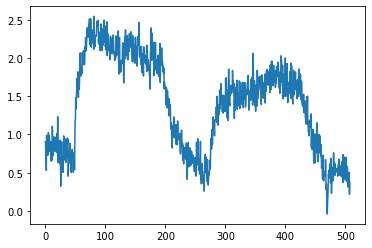

In [16]:
for archivo in archivos:
    df = ensayos[archivo[:19]]
    for sensor in range(4,8):
        nombre_sensor = 'S-ext-'+str(sensor)
        nombre_delta_T = 'Delta'+str(sensor)
        df[nombre_delta_T] = df[nombre_sensor]-df['S-ext-3']
    ensayos[archivo[:19]] = df
print(ensayos['P2,3 en IWT-70ms_4A'])  
ensayos['P2,3 en IWT-70ms_4A']['Delta7'].plot()

0.0      0.905
0.5      0.820
1.0      0.727
1.5      0.530
2.0      0.989
         ...  
505.5    0.423
506.0    0.467
506.5    0.504
507.0    0.217
507.5    0.372
Name: Delta7, Length: 1016, dtype: float64
[0.905 0.82  0.727 ... 0.504 0.217 0.372]


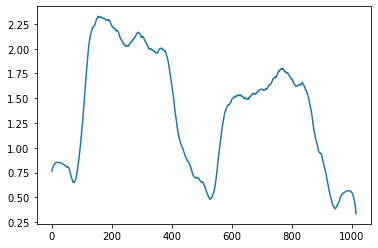

In [34]:
#savgol_filter(x, 5, 2)
print(ensayos['P2,3 en IWT-70ms_4A']['Delta7'])
Temperatura = np.array(ensayos['P2,3 en IWT-70ms_4A']['Delta7'])
print(Temperatura)
Temperatura_filtrada = savgol_filter(Temperatura, 101, 5)
plt.figure()
plt.plot(Temperatura_filtrada)


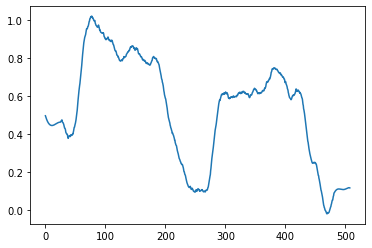

In [37]:
for archivo in archivos:
    df = ensayos[archivo[:19]]
    for sensor in range(4,8):
        nombre_delta_T = 'Delta'+str(sensor)
        nombre_delta_filtrada = 'DeltaF'+str(sensor)
        Temperatura = np.array(df[nombre_delta_T])
        df[nombre_delta_filtrada] = savgol_filter(Temperatura, 101, 5)
    ensayos[archivo[:19]] = df
ensayos['P2,3 en IWT-70ms_4A']['DeltaF6'].plot()